 #  **120 Years of Olympic History - Group number 1** 

---

<center><img src="https://media4.giphy.com/media/l2SpVPT2FnKozPDby/giphy.gif?cid=ecf05e47oj3fdr2c0vxys8zt8rauepk2bkwtjqdy1y3qtf86&rid=giphy.gif&ct=g"  
     width="500"  > </center>
     
---

    
 ## **Presenting by:**
 ### Eliya Zaguri ### 
 ### Matan Shlomo Vidal ###
 ### Adar Saban ###
  
  




## **Table of Contents:** 

Link to source : https://www.kaggle.com/datasets/mysarahmadbhat/120-years-of-olympic-history

Link to github project page :https://github.com/AdarSaban/olypmic_project

1. [Arranging and clearing the data according to our needs](#section1)

2. [Key comprehension](#section2)

3. [First conclusion](#section3)

4. [Second conclusion](#section4)

5. [Third conclusion](#section5)

6. [Final conclusion](#section6)

7. [Prediction](#section7)

7. [Summary](#section8)


---

<a id='section1'></a>
 # $\color{navy}{\text{Organize and Clearing the Data According to Our Needs}}$ 


### Performing import and reading of a database.


In [102]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import numpy as np
from sklearn.linear_model import LinearRegression
url='https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/athlete_events%20-%20Copy.csv '
data=pd.read_csv(url)

In [103]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Checking the indentation of the column title.

In [104]:
data.dtypes 

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

### Rename the column 'City' to 'Host city'

In [105]:
data=data.rename(columns={'City':'Host_city'})

### Filling in missing values ​​for each sport in its field according to the average of that field.

In [106]:
data["Age"] = data.groupby('Sport')['Age'].apply(lambda x: x.fillna(x.mean()))
data["Height"] = data.groupby('Sport')['Height'].apply(lambda x: x.fillna(x.mean()))
data["Weight"] = data.groupby('Sport')['Weight'].apply(lambda x: x.fillna(x.mean()))

### Deletion of sports categories where the number of medals is low. Focus on popular sports.

In [107]:
data.Sport.unique()
data['Sport'].value_counts(ascending=True)
data=data.groupby('Sport').filter(lambda x : len(x)>100) 
data['Sport'].value_counts(ascending=False)

Athletics                    27472
Gymnastics                   18333
Swimming                     16298
Shooting                      8086
Fencing                       7772
Cycling                       7716
Rowing                        7319
Cross Country Skiing          6364
Alpine Skiing                 6319
Wrestling                     4994
Football                      4933
Sailing                       4710
Equestrianism                 4470
Boxing                        4350
Canoeing                      4302
Speed Skating                 3829
Ice Hockey                    3746
Hockey                        3707
Biathlon                      3301
Basketball                    3243
Weightlifting                 2766
Judo                          2705
Handball                      2652
Water Polo                    2628
Art Competitions              2597
Volleyball                    2323
Bobsleigh                     2076
Diving                        2008
Tennis              

### Check that there are no fileds with missing values. (Except what we want).

In [108]:
data.isnull().sum().sort_values(ascending=True)

ID                0
Name              0
Sex               0
Age               0
Height            0
Weight            0
Team              0
NOC               0
Games             0
Year              0
Season            0
Host_city         0
Sport             0
Event             0
Medal        162761
dtype: int64

---
<a id='section2'> </a>
 # $\color{navy}{\text{Key Comprehension}}$ 

### Presentation of the top 10 countries with the most participants and medals over the years .

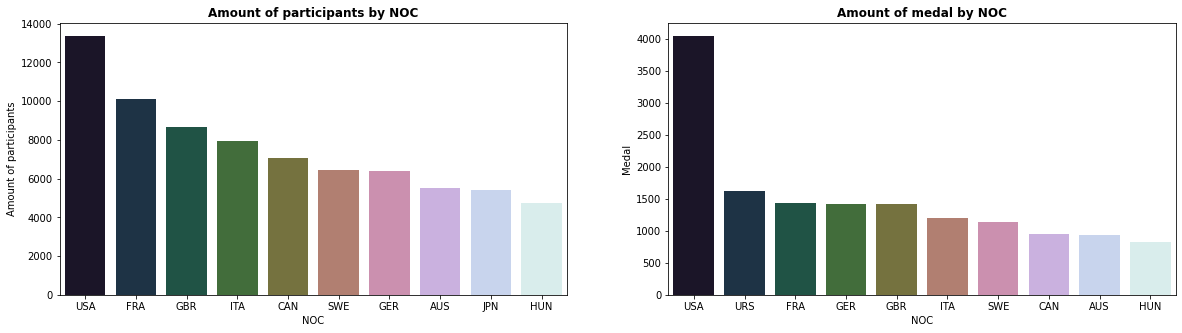

In [109]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
Top_10=pd.DataFrame(data[['NOC']].value_counts().sort_values(ascending=False).head(10).reset_index(name='Amount of participants'))
barpolt_amount_of_part=sns.barplot(data=Top_10,x='NOC',y='Amount of participants',ax=axes[0],palette="cubehelix");
Medal_by_countries=data.groupby(['NOC'])[['Medal']].count().sort_values(by='Medal',ascending=False).reset_index().head(10)
barplot_amount_of_medal=sns.barplot(data=Medal_by_countries,x='NOC',y='Medal',ax=axes[1],palette="cubehelix");
plt.subplots_adjust(wspace = 0.2)
barpolt_amount_of_part.set_title('Amount of participants by NOC',fontweight ="bold")
barplot_amount_of_medal.set_title('Amount of medal by NOC',fontweight ="bold")
plt.show()

---
<a id='section3'> </a>
  # $\color{navy}{\text{First Conclusion}}$ 

### We examined whether there is a difference in gender gap in participation and winning a medal over the years. 

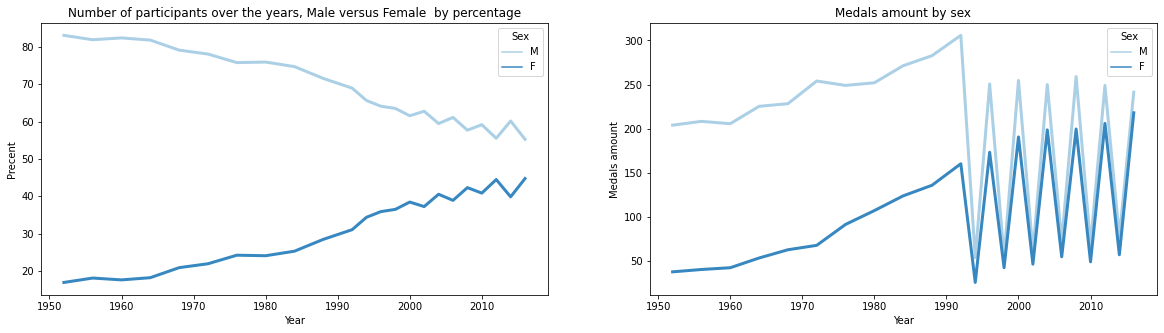

In [110]:
fig, axes = plt.subplots(figsize=(20,5), ncols=2)
last_sixty_years=data[data.Year>=1950] 
data_by_sex_year=last_sixty_years.groupby('Year')[['Sex']].value_counts().reset_index(name='Participants')
data_by_sex_year['Precent']=data_by_sex_year.groupby('Year')['Participants'].transform(lambda x:(x/x.sum()*100))
first_conclusion=sns.lineplot(data=data_by_sex_year, x="Year", y="Precent", hue="Sex",ax=axes[0],palette='Blues',lw=3);
first_conclusion.set_title('Number of participants over the years, Male versus Female  by percentage');
g_medal_by_sex_year=last_sixty_years.groupby(['Sex','Year'])['Medal'].value_counts().reset_index(name='Medals amount').sort_values(by='Medals amount',ascending=False)
lineplot_Medal_amount_by_sex=sns.lineplot(data=g_medal_by_sex_year, x="Year", y="Medals amount", hue="Sex",ax=axes[1],palette="Blues",ci=None,lw=3);
plt.subplots_adjust(wspace = 0.2)
lineplot_Medal_amount_by_sex.set_title('Medals amount by sex');
plt.show()

 ## As can be seen from the graphs, The gap is narrowing both in the number of participants and in the number of medal wins over the years.
<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/olympic-gender.jpg" alt="centered image" 
     width="600"  > </center>



---
<a id='section4'></a>
  #  $\color{navy}{\text{Second conclusion}}$ 

### According to the research "[Peak Peformance Age in Sport](#section9)", Athletes in sports requiring speed and power tend to peak by their mid-20s. We wanted to examine if the age of winning the medal matched the statement.

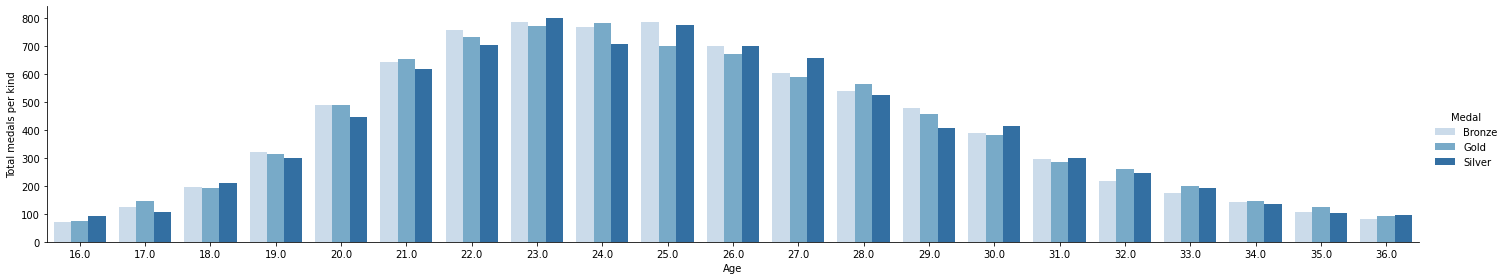

In [111]:
data_no_NaN=data.dropna()
data_no_NaN.isnull().sum().sort_values(ascending=False)
data_no_NaN=data_no_NaN[(data_no_NaN.Age<=36)&(data_no_NaN.Age>=16)].round()
data_Age_by_Medal=data_no_NaN.groupby('Medal')[['Age']].value_counts().reset_index(name='Total medals per kind').round(1)
data_Age_by_Medal=pd.DataFrame(data_Age_by_Medal)
sns.catplot(data=data_Age_by_Medal,x="Age",y="Total medals per kind",kind="bar",aspect=5,height=4,hue="Medal",palette='Blues');

### As can be seen from the graph, the winning age that achieve  the most medals is between ages 23-25. The claim match the winning age.
<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/b5bd4ec22670af03b5a9bd16edf66680afa0e941/hhfs9tf9mck02d8ilnqq.jpg" alt="centered image" height="200
    " width="1400"> </center>



---
<a id='section5'></a>
  # $\color{navy}{\text{Third conclusion}}$ 

### BMI is a measure that gives a quantitative assessment of whether a person is at a normal weight and height. 
### We examined whether there is a connection between precise BMI(18.5-25) measure and winning  a medal .


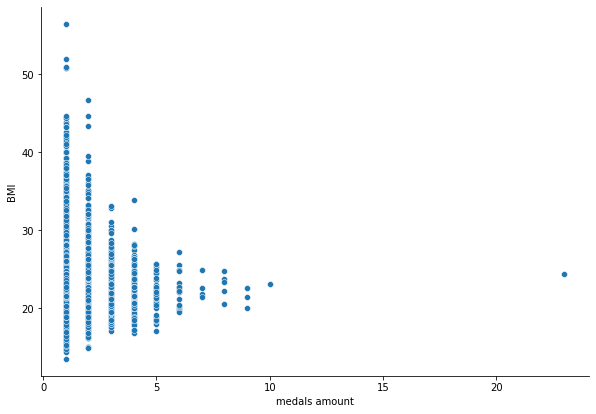

In [112]:
data_of_medal_by_id=data.groupby(['ID','Name','Height','Weight'])['Medal'].value_counts().reset_index(name='medals amount')
data_with_BMI=data_of_medal_by_id.assign(BMI=lambda x: ((x['Weight'])/ ( (x['Height']/100)**2) ))
data_with_BMI
plot = sns.relplot(x='medals amount',y="BMI", data=data_with_BMI, kind="scatter",palette="Blues");
plot.fig.set_size_inches(9,6)

In [113]:
Michael_Fred_Phelps=data_with_BMI.loc[data_with_BMI['medals amount']>=20]
Michael_Fred_Phelps

,ID,Name,Height,Weight,Medal,medals amount,BMI
23007,94406,"Michael Fred Phelps, II",193.0,91.0,Gold,23,24.430186


### As can be seen from the graph, there is a correlation between accurate BMI and number of medals.
### The athletes whos wons an extraordinary medals number, approached to have a more accurate BMI.

<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/f92b1ea8-0e84-72c9-2a95-9b11fd9dc8bb.jpg" alt="centered image" height="200
    " width="800"> </center>


---
<a id='section6'></a>
  # $\color{navy}{\text{Final Conclusion}}$ 



### We wished to examine whether there is an increase of medals wins when country hosts the Olympics. 
### And how significant the hosting effects the number of medals.

In [114]:
data.Host_city.unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Calgary',
       'Albertville', 'Lillehammer', 'Los Angeles', 'Salt Lake City',
       'Helsinki', 'Lake Placid', 'Sydney', 'Atlanta', 'Stockholm',
       'Sochi', 'Nagano', 'Torino', 'Beijing', 'Rio de Janeiro', 'Athina',
       'Squaw Valley', 'Innsbruck', 'Sarajevo', 'Mexico City', 'Munich',
       'Seoul', 'Berlin', 'Oslo', "Cortina d'Ampezzo", 'Melbourne',
       'Roma', 'Amsterdam', 'Montreal', 'Moskva', 'Tokyo', 'Vancouver',
       'Grenoble', 'Sapporo', 'Chamonix', 'St. Louis', 'Sankt Moritz',
       'Garmisch-Partenkirchen'], dtype=object)

In [116]:
len(data.Host_city.unique())

42

In [117]:
NOC_dict={'ESP':'Barcelona',
       'London':'GBR',
       'Antwerpen':'BEL',
       **dict.fromkeys(['Paris','Albertville','Chamonix','Grenoble'],'FRA'), 
       **dict.fromkeys(['Calgary','Montreal','Vancouver'],'CAN'),
       **dict.fromkeys(['Lillehammer','Oslo'],'NOR'),
       **dict.fromkeys(['Los Angeles','Salt Lake City','Atlanta','Lake Placid','Squaw Valley','Mexico City','St. Louis'],'USA'),
       'Seoul':'KOR',
       **dict.fromkeys(['Berlin','Munich', 'Garmisch-Partenkirchen'],'GER'),
       'Stockholm':'SWE',
       **dict.fromkeys(['Nagano','Tokyo','Sapporo'],'JPN'),
       **dict.fromkeys(['Sydney','Melbourne'],'AUS'),  
       'Rio de Janeiro':'BRA',
       **dict.fromkeys(['Roma','Torino',"Cortina d'Ampezzo"],'ITA'),
       'Beijing':'CHN',
       'Athina':'GRE',
       **dict.fromkeys(['Moskva','Sochi'],'URS'),
       'Amsterdam':'NED',
       'Helsinki':'FIN',
       'Sarajevo':'BIH',
       'Innsbruck':'AUT',
       'Sankt Moritz':'SUI'}   

In [118]:
data['Host_city_by_NOC']=data.Host_city.map(NOC_dict)
data.loc[data.Host_city=='Athina'].head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Host_city,Sport,Event,Medal,Host_city_by_NOC
82,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,NOR,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN,GRE
135,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,EST,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN,GRE
171,72,Aleksey Aleksandrovich Abalmasov,M,24.0,180.0,83.0,Belarus,BLR,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN,GRE
177,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",NaN,GRE
183,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,GRE,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NaN,GRE


## In that conclusion we wanted to express all our previous conclusions, so that a host country would be our dominant variable in this test.





In [129]:
median_BMI=data_with_BMI.BMI.median()
data['BMI']=data_with_BMI['BMI'].round(2)
data.BMI.fillna(median_BMI,inplace=True)
new_data=data.loc[(data.BMI<=25)&(data.BMI>=18.5)&(data.Age<=26)&(data.Age>=22)].round(2).copy()
new_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Host_city,Sport,Event,Medal,Host_city_by_NOC,BMI
1,2,A Lamusi,M,23.0,170.0,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,GBR,22.12
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,178.5,70.48,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,FIN,20.23
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.50,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,USA,22.58
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.00,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,NOR,24.22
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.00,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,NOR,23.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190351,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 400 metres Freestyle,NaN,NaN,22.99
190352,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,"Swimming Men's 1,500 metres Freestyle",NaN,NaN,22.99
190353,95600,Mariusz Podkocielny,M,24.0,193.0,75.00,Poland,POL,1992 Summer,1992,Summer,Barcelona,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,NaN,NaN,22.99
190356,95601,Iouri Aleksandrovich Podladtchikov,M,25.0,184.0,76.00,Switzerland,SUI,2014 Winter,2014,Winter,Sochi,Snowboarding,Snowboarding Men's Halfpipe,Gold,URS,22.99


In [120]:
new_data['host country?']=np.where(new_data.NOC==new_data.Host_city_by_NOC,'True','False')
new_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,Host_city,Sport,Event,Medal,Host_city_by_NOC,BMI,host country?
1,2,A Lamusi,M,23.0,170.0,60.00,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,GBR,22.12,False
29,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,178.5,70.48,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NaN,FIN,20.23,True
30,11,Jorma Ilmari Aalto,M,22.0,182.0,76.50,Finland,FIN,1980 Winter,1980,Winter,Lake Placid,Cross Country Skiing,Cross Country Skiing Men's 30 kilometres,NaN,USA,22.58,False
63,20,Kjetil Andr Aamodt,M,22.0,176.0,85.00,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Downhill,Silver,NOR,24.22,True
64,20,Kjetil Andr Aamodt,M,22.0,176.0,85.00,Norway,NOR,1994 Winter,1994,Winter,Lillehammer,Alpine Skiing,Alpine Skiing Men's Super G,Bronze,NOR,23.95,True


In [121]:
data_true=new_data.loc[new_data['host country?']=='True']
all_participent_t=len(data_true)
all_winners_t=len(data_true.dropna())
true_ratio=(all_winners_t/all_participent_t)*100
true_ratio

24.6980911569926

In [122]:
false=new_data.loc[new_data['host country?']=='False']
all_participent_f=len(false)
all_winners_f=len(false.dropna())
false_ratio=(all_winners_f/all_participent_f)*100
false_ratio

13.264391791647693

In [130]:
df = pd.DataFrame({'host': [true_ratio , 100-true_ratio],'guest': [false_ratio,100- false_ratio]},
index=['medal winning percent', 'not winning medal  percent'])
df

,host,guest
medal winning percent,24.698091,13.264392
not winning medal percent,75.301909,86.735608


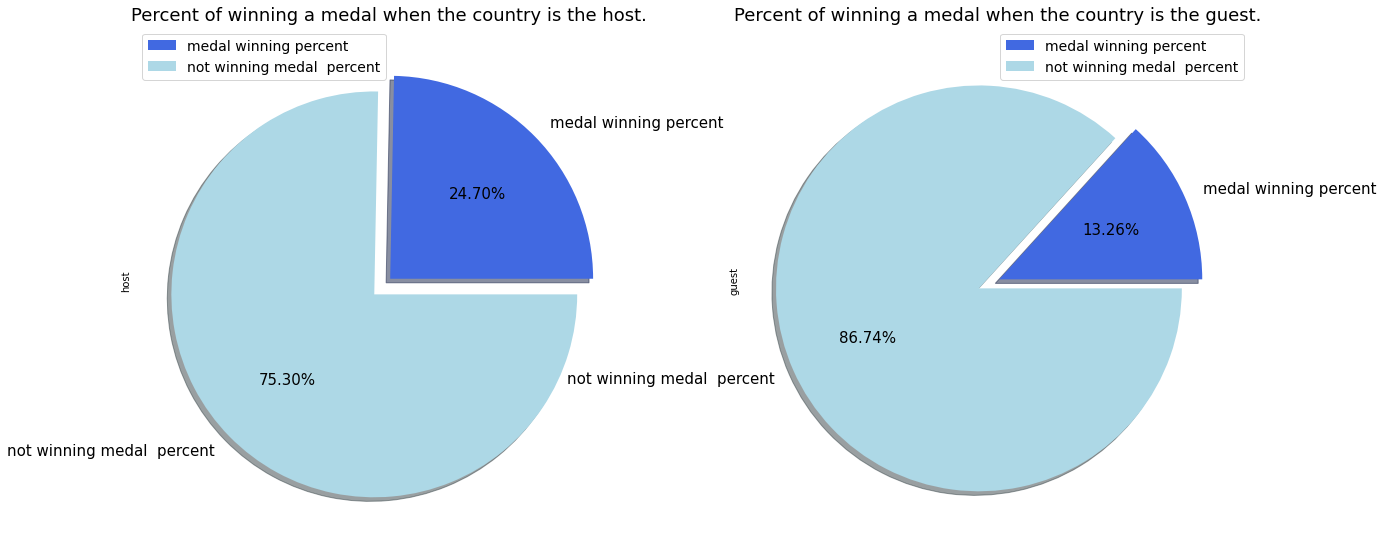

In [124]:
plt.figure(figsize=(20, 20))
plt.subplot(1,2,1)
plt.title("Percent of winning a medal when the country is the host.",fontsize=18)
plotpie=df['host'].plot.pie(autopct='%1.2f%%',colors = ['royalblue', 'lightblue'],fontsize=15,explode=(0.01, 0.1),shadow=True,legend=False)
plt.legend(fontsize=14)
plt.subplot(1,2,2)
plt.title("Percent of winning a medal when the country is the guest.",fontsize=18)
plotpie=df['guest'].plot.pie(autopct='%1.2f%%',colors = ['royalblue', 'lightblue'],fontsize=15,explode=(0.01, 0.1),shadow=True,legend=False)
plt.legend(fontsize=14)
plt.show()

### As can be seen from the graphs,
### When a country hosts  Olympics the probability of winning medals increases by more than 10 percents compared to times when a country is the guest .  
---

<a id='section7'></a>
  # $\color{navy}{\text{Prediction}}$ 
### We wanted to precdict how many Gold medals USA and Italy will win in 2020 olympic.

In [125]:
data.Year.max()

2016

In [131]:
medal_counts=data.groupby(['NOC','Year'],as_index=False)['Medal'].value_counts()
medal_counts
d = {'NOC': ['USA','ITA'], 'Year': [2020,2020],'Medal':['Gold','Gold']}
predict_year=pd.DataFrame(d)
medal_counts=pd.concat([predict_year, medal_counts], ignore_index=True)
medal_counts.loc[medal_counts['Medal']=='Gold','Medal']=3
medal_counts.loc[medal_counts['Medal']=='Silver','Medal']=2
medal_counts.loc[medal_counts['Medal']=='Bronze','Medal']=1
medal_counts['Medal']=medal_counts.Medal.astype(int)
medal_counts = pd.get_dummies(data=medal_counts, drop_first=True)
x_train = medal_counts.drop(['count'],axis=1).loc[(medal_counts.Year<2020)]
y=medal_counts[['count']].dropna()
model = LinearRegression().fit(x_train, y)
model_score = model.score(x_train, y)
x_test=medal_counts.loc[(medal_counts.Year==2020)].drop(['count'],axis=1)
y_pred = model.predict(x_test)

In [127]:
print(f"USA predicted response of gold medal in 2020 : {y_pred[0]}")

USA predicted response of gold medal in 2020 : [39.60030619]


### At the 2020 Olympic United States won 39 gold medals, very close to our prediction.

In [132]:
print(f"ITA predicted response of gold medal in 2020 : {y_pred[1]}")

ITA predicted response of gold medal in 2020 : [14.15449595]


### At the 2020 Olympic Italy won 10 gold medals.

---
<a id='section8'></a>
  # $\color{navy}{\text{Summary}}$ 


# Presenting a number of key conclusions regarding the Olympics in modern times, leading countries, narrowing the gaps between women and men, defining the ultimate athlete, the effects of hosting  Olympic and prediction for 2020 .

<center><img src="https://raw.githubusercontent.com/AdarSaban/olypmic_project/main/Olympic-Games.jpg" alt="centered image" 
     width="600"  > </center>


---

  # $\color{navy}{\text{REFERENCES}}$ 
  <a id='section9'> </a>

"Peak Peformance Age in Sport" - https://cepar.edu.au/sites/default/files/peak-performance-age-sport.pdf